# !. Regression - avg price for 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_excel('Country-Code.xlsx')

In [3]:
data2 = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='latin')

In [4]:
data = pd.merge(data2,data1,how='left')

In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [6]:
data.set_index('Restaurant ID',inplace=True)

In [7]:
data.shape

(9551, 21)

our dataset has 9551 row of data, 20 features and 1 label

In [8]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(9551, 21)

no duplicate data present in the dataset

# DATA PRE PROCESSING

In [11]:
data.isna().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

cuisine has some null values present, we can drop the values

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(9542, 21)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9542.0,18.179208,56.451600,1.000000,1.000000,1.000000,1.000000,216.000000
Longitude,9542.0,64.274997,41.197602,-157.948486,77.081565,77.192031,77.282043,174.832089
Latitude,9542.0,25.848532,11.010094,-41.330428,28.478658,28.570444,28.642711,55.976980
Average Cost for two,9542.0,1200.326137,16128.743876,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9542.0,1.804968,0.905563,1.000000,1.000000,2.000000,2.000000,4.000000
Aggregate rating,9542.0,2.665238,1.516588,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9542.0,156.772060,430.203324,0.000000,5.000000,31.000000,130.000000,10934.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 6317637 to 5927402
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Address               9542 non-null   object 
 4   Locality              9542 non-null   object 
 5   Locality Verbose      9542 non-null   object 
 6   Longitude             9542 non-null   float64
 7   Latitude              9542 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9542 non-null   int64  
 10  Currency              9542 non-null   object 
 11  Has Table booking     9542 non-null   object 
 12  Has Online delivery   9542 non-null   object 
 13  Is delivering now     9542 non-null   object 
 14  Switch to order menu  9542 non-null   object 
 15  Price range 

dropping some unwanted columns

setting the label within a range so we can  get better results

In [16]:
data = data[data['Average Cost for two']>100]

In [17]:
data = data[data['Average Cost for two']<5000]

In [18]:
data.shape

(8471, 21)

In [19]:
cat_data = data.select_dtypes('object').columns.tolist()

In [20]:
cont_data = data.select_dtypes(['float64','int64']).columns.tolist()

In [21]:
cont_data.remove('Average Cost for two')

In [22]:
len(cat_data)

14

In [23]:
len(cont_data)

6

# EDA

In [24]:
for i in data[cat_data]:
    print(f'{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n')

6455
Cafe Coffee Day              83
Domino's Pizza               79
Subway                       63
Green Chick Chop             51
McDonald's                   48
                             ..
Blue Water Grille Express     1
Bite & More                   1
Barichi                       1
Zaika Muradabadi              1
Aôôk Kahve                  1
Name: Restaurant Name, Length: 6455, dtype: int64

75
New Delhi        5167
Gurgaon          1103
Noida            1049
Faridabad         231
Ghaziabad          24
                 ... 
Tagaytay City       1
Birmingham          1
Paynesville         1
Mohali              1
Manchester          1
Name: City, Length: 75, dtype: int64

7897
Sector 41, Noida                                                                11
Dilli Haat, INA, New Delhi                                                      11
Greater Kailash (GK) 1, New Delhi                                               10
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapur

removing data that has too much variance and some unwanted columns

In [25]:
data.drop(['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Switch to order menu','Is delivering now','Has Online delivery','Has Table booking'],axis=1,inplace=True)

In [26]:
cat_data.remove('Restaurant Name')

In [27]:
cat_data.remove('Address')

In [28]:
cat_data.remove('Locality')

In [29]:
cat_data.remove('Locality Verbose')

In [30]:
cat_data.remove('Cuisines')

In [31]:
cat_data.remove('City')

In [32]:
cat_data.remove('Switch to order menu')

In [33]:
cat_data.remove('Is delivering now')

In [34]:
cat_data.remove('Has Table booking')

In [35]:
cat_data.remove('Has Online delivery')

In [36]:
len(cat_data)

4

# EDA

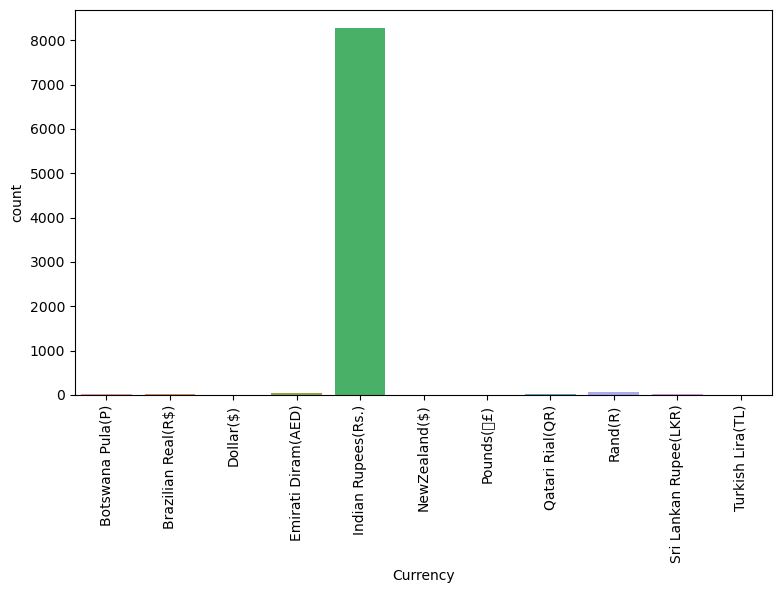

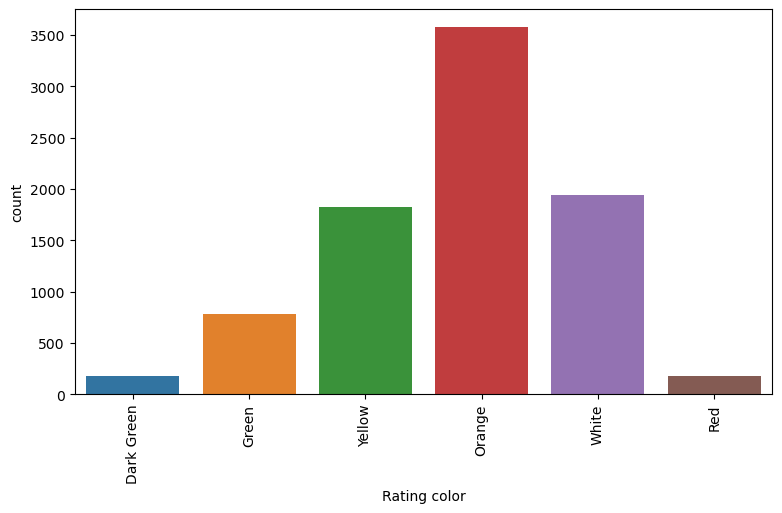

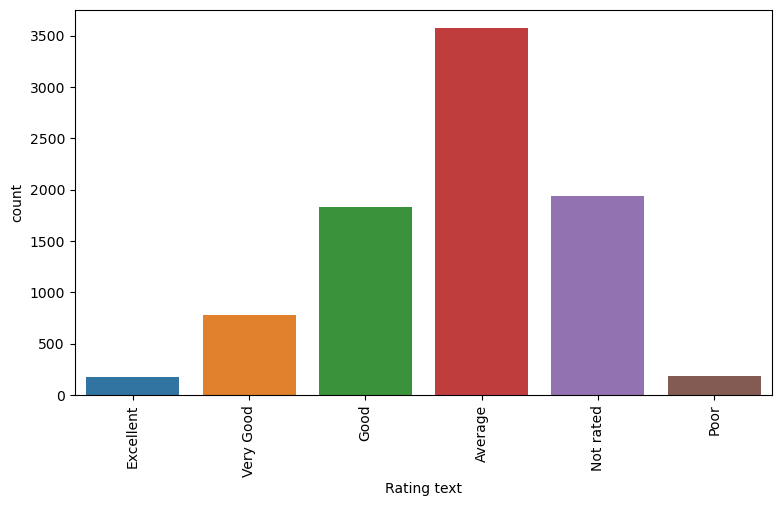

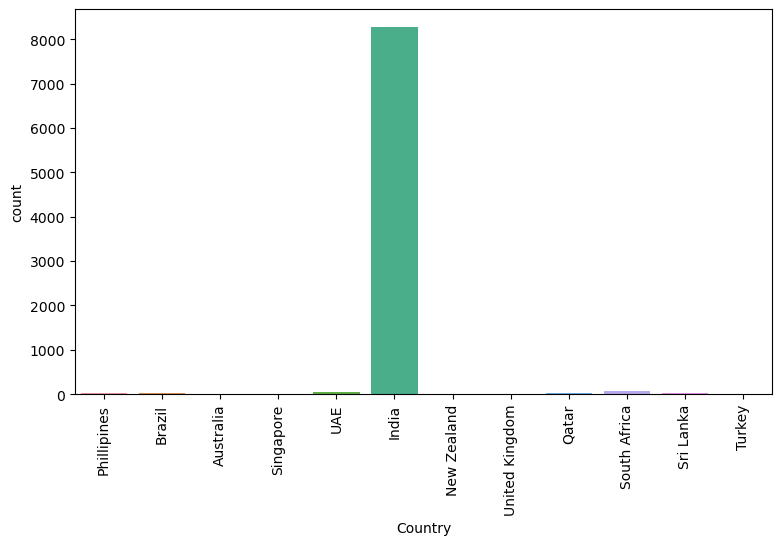

In [37]:
for i in data[cat_data]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=data[cat_data][i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

1. most of the currency is in INR

2. most of the places have orange color rating

3. most of the places are average rating

4. most of the places are located in india

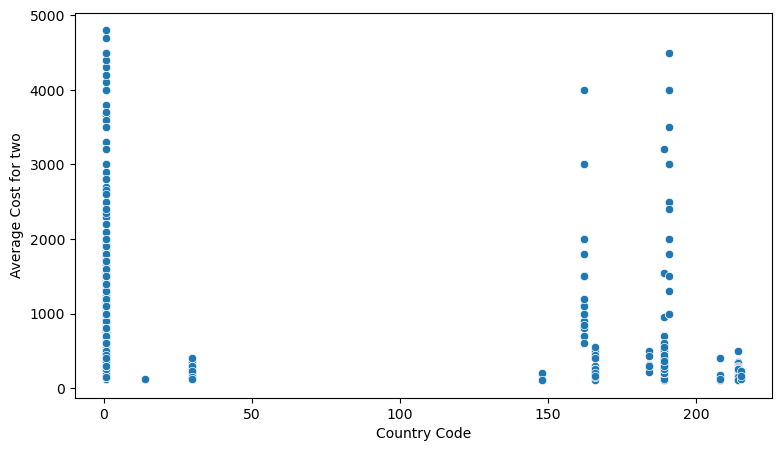

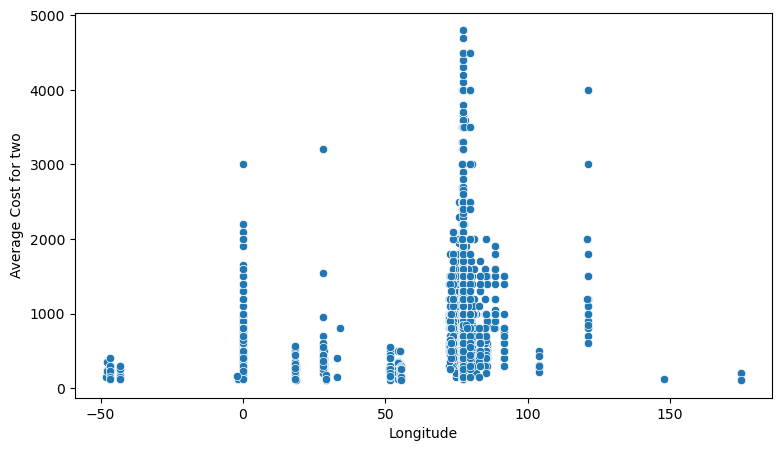

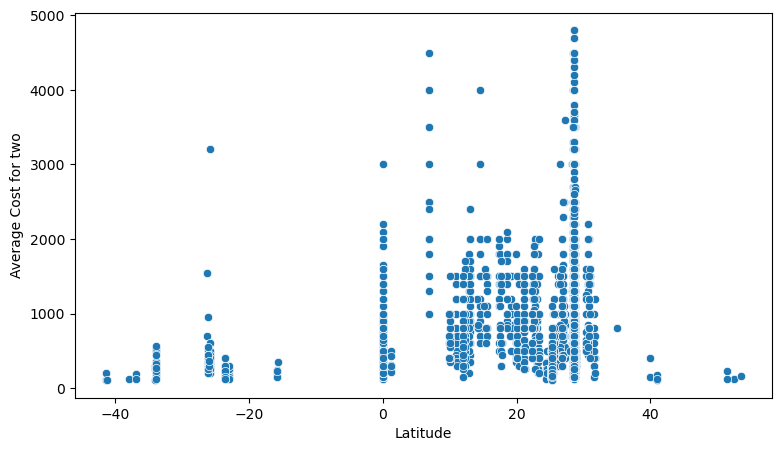

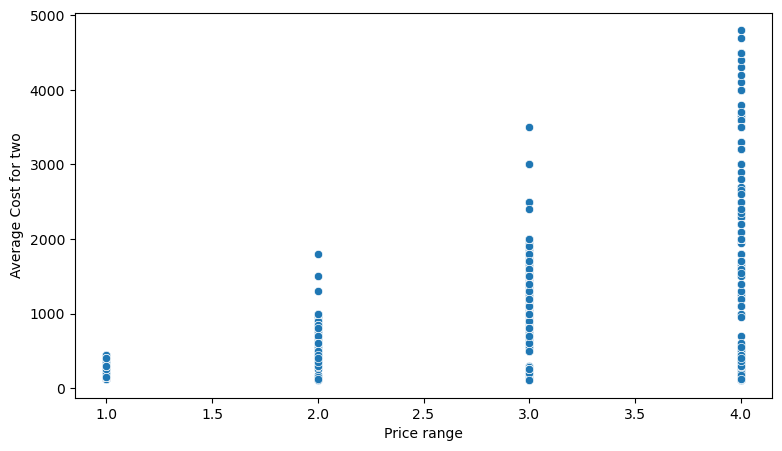

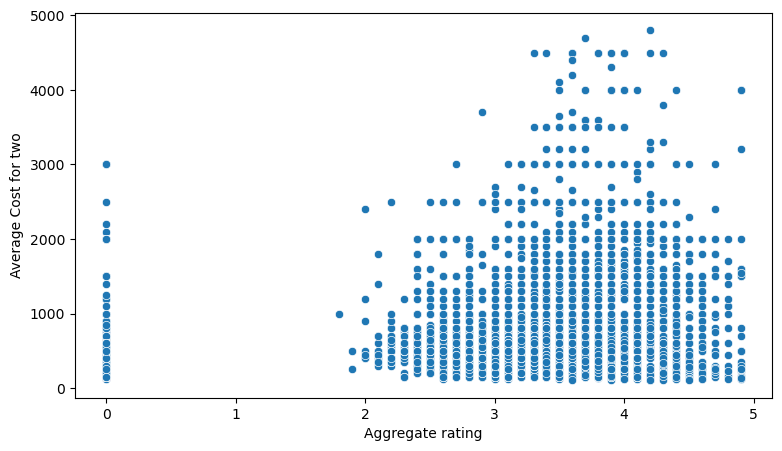

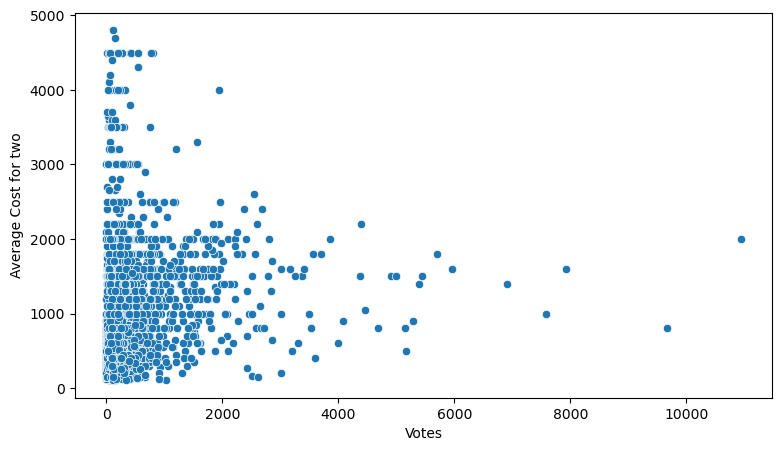

In [38]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[cont_data][i],y = data['Average Cost for two'])
    plt.xlabel(i)
    plt.show()

In [39]:
data.drop(['Longitude','Latitude','Country Code'],axis=1,inplace=True)

In [40]:
cont_data.remove('Longitude')

In [41]:
cont_data.remove('Latitude')

In [42]:
cont_data.remove('Country Code')

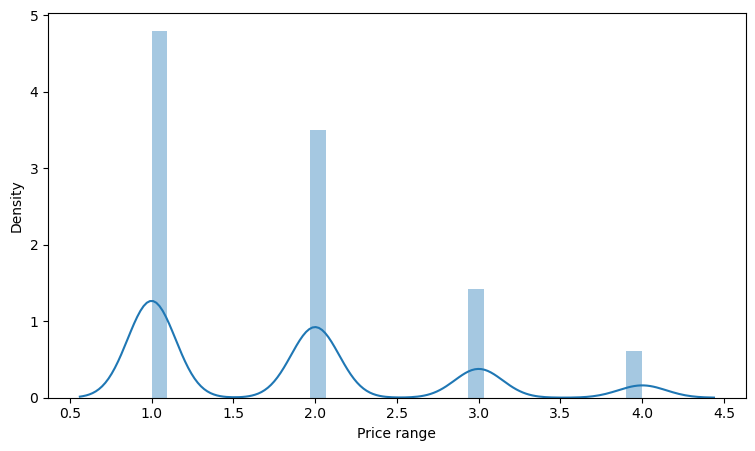

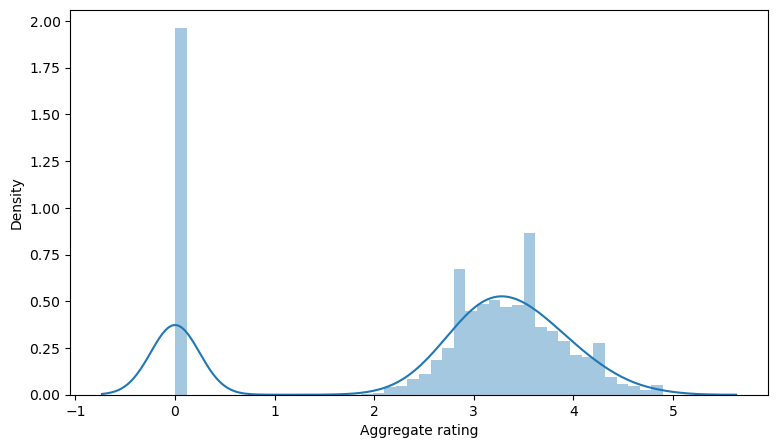

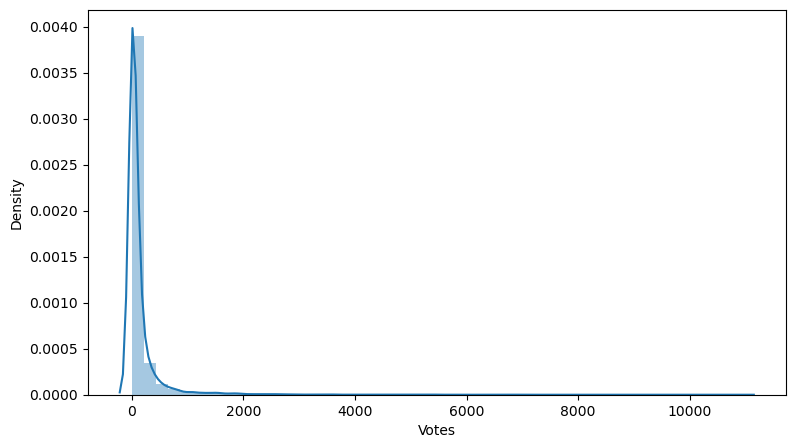

In [43]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.distplot(data[cont_data][i])
    plt.xlabel(i)
    plt.show()

price range is discrete data while average rating and votes are continous data

In [44]:
continous = ['Votes','Aggregate rating']

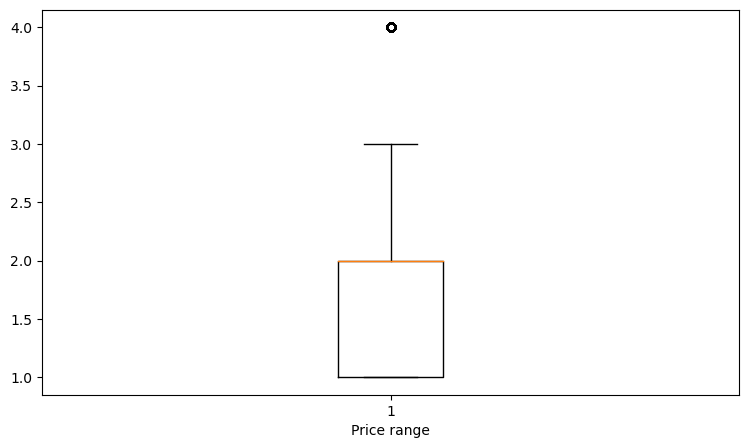

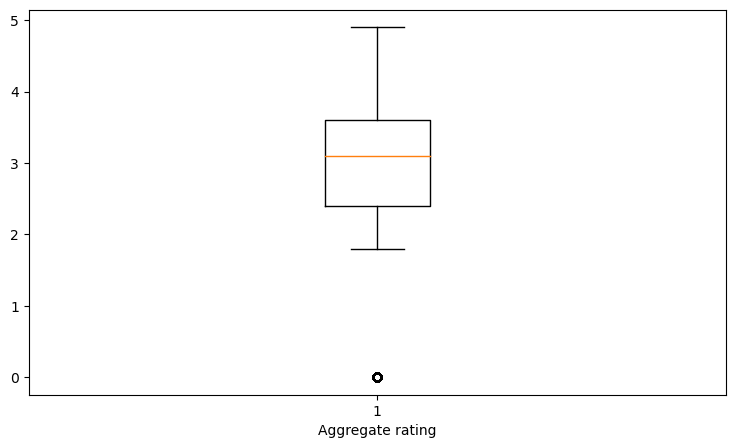

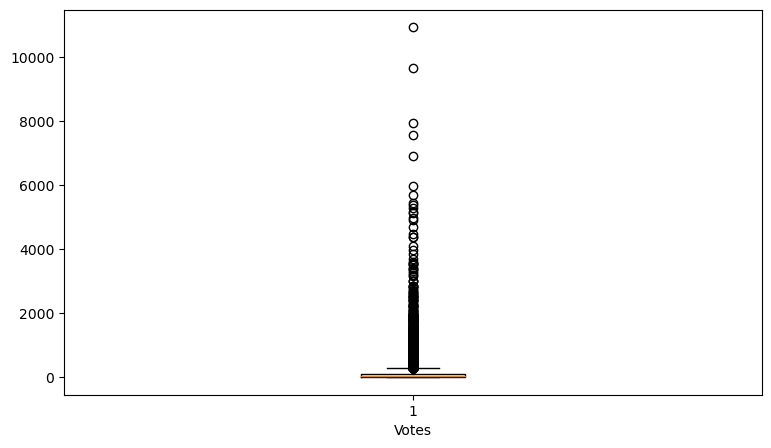

In [45]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    plt.boxplot(x=data[cont_data][i])
    plt.xlabel(i)
    plt.show()


votes has outliers

# DEALING WITH OUTLIERS

In [46]:
z = zscore(data[continous])

In [47]:
data = data[(z<3).all(axis=1)]

In [48]:
data.shape

(8321, 8)

In [49]:
data_loss = (8471-8321)/8471

In [50]:
data_loss

0.017707472553417543

# FEATURE SELECTION

In [51]:
data.corr()['Average Cost for two'].sort_values()

Aggregate rating        0.320708
Votes                   0.356690
Price range             0.780881
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

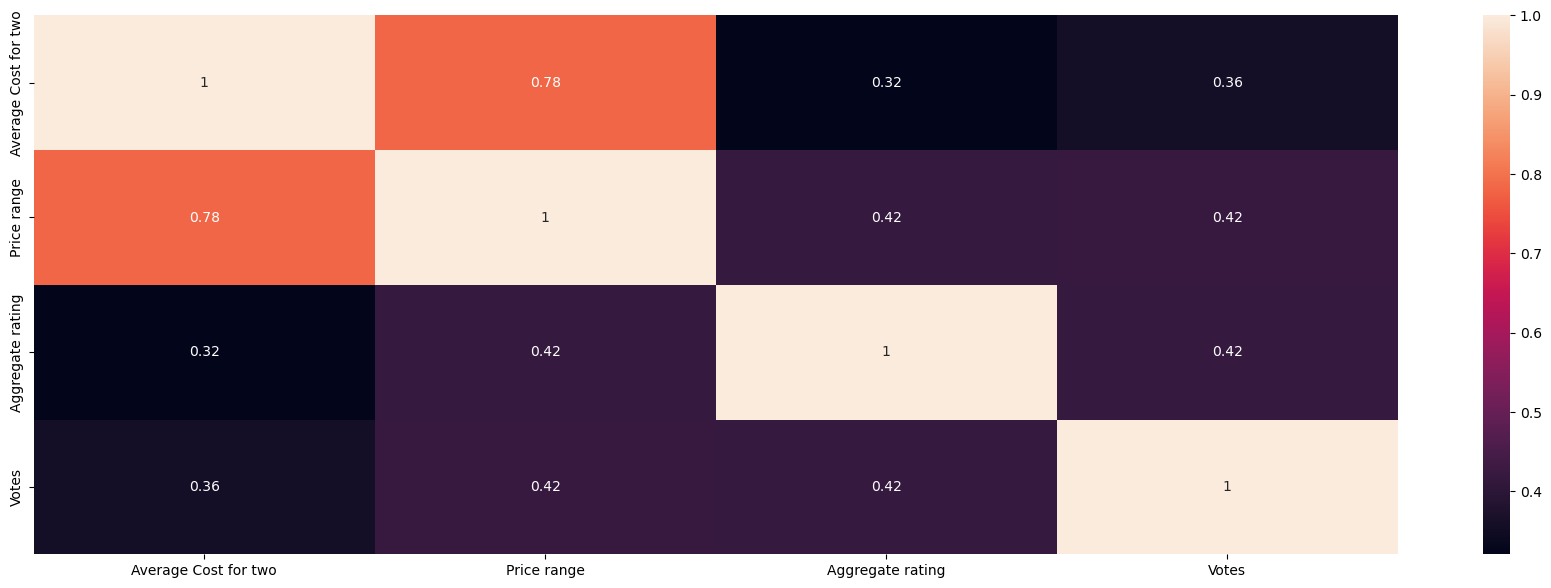

In [52]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

In [53]:
data.head()

,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,
6317637,1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,314,Phillipines
6304287,1200,Botswana Pula(P),3,4.5,Dark Green,Excellent,591,Phillipines
6300002,4000,Botswana Pula(P),4,4.4,Green,Very Good,270,Phillipines
6318506,1500,Botswana Pula(P),4,4.9,Dark Green,Excellent,365,Phillipines
6314302,1500,Botswana Pula(P),4,4.8,Dark Green,Excellent,229,Phillipines


In [54]:
data.shape

(8321, 8)

In [55]:
le = LabelEncoder()

In [56]:
cat_data

['Currency', 'Rating color', 'Rating text', 'Country']

In [57]:
data['Currency'] = le.fit_transform(data['Currency'])

In [58]:
data['Rating color'] = le.fit_transform(data['Rating color'])

In [59]:
data['Rating text'] = le.fit_transform(data['Rating text'])

In [60]:
data['Country'] = le.fit_transform(data['Country'])

In [61]:
#data['Has Table booking'] = le.fit_transform(data['Has Table booking'])

In [62]:
#data['Has Online delivery'] = le.fit_transform(data['Has Online delivery'])

In [63]:
data.head()

,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,
6317637,1100,0,3,4.8,0,1,314,4
6304287,1200,0,3,4.5,0,1,591,4
6300002,4000,0,4,4.4,1,5,270,4
6318506,1500,0,4,4.9,0,1,365,4
6314302,1500,0,4,4.8,0,1,229,4


In [64]:
#ss = StandardScaler()

In [65]:
cat_data

['Currency', 'Rating color', 'Rating text', 'Country']

In [66]:
cont_data

['Price range', 'Aggregate rating', 'Votes']

# DATA SCALING

In [67]:
pt = PowerTransformer()

In [68]:
data[cont_data] = pt.fit_transform(data[cont_data])

In [69]:
#data[cont_data] = ss.fit_transform(data[cont_data])

In [70]:
data.head()

,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,
6317637,1100,0,1.326151,1.982458,0,1,1.374713,4
6304287,1200,0,1.326151,1.641686,0,1,1.732090,4
6300002,4000,0,1.735048,1.531209,1,5,1.290425,4
6318506,1500,0,1.735048,2.099142,0,1,1.459137,4
6314302,1500,0,1.735048,1.982458,0,1,1.198931,4


In [71]:
x = data.drop('Average Cost for two',axis=1)

y = data['Average Cost for two']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=666)

# LR

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [75]:
pred1 = lr.predict(x_train)

In [76]:
pred2 = lr.predict(x_test)

In [77]:
print(f'Train Score: {r2_score(y_train,pred1)}')

Train Score: 0.5202240264666919


In [78]:
print(f'Tets Score: {r2_score(y_test,pred2)}')

Tets Score: 0.5325215835911589


In [79]:
a1 = r2_score(y_train,pred1)

In [80]:
a2 = r2_score(y_test,pred2)

In [81]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.47208113945462904

# LASSO

In [82]:
ls = Lasso()

In [83]:
ls.fit(x_train,y_train)

Lasso()

In [84]:
pred3 = ls.predict(x_train)

In [85]:
pred4 = ls.predict(x_test)

In [86]:
print(f"Training Score: {r2_score(y_train,pred3)}")

Training Score: 0.5201801618308914


In [87]:
print(f"Test Score: {r2_score(y_test,pred4)}")

Test Score: 0.5320964668616217


In [88]:
a4 = r2_score(y_train,pred3)

In [89]:
a5 = r2_score(y_test,pred4)

In [90]:
cv = cross_val_score(ls,x,y)

a6 = cv.mean()

a6

0.4722579591568178

# RIDGE

In [91]:
ri = Ridge()

In [92]:
ri.fit(x_train,y_train)

Ridge()

In [93]:
pred5 = ri.predict(x_train)

In [94]:
pred6 = ri.predict(x_test)

In [95]:
print(f"Training Score: {r2_score(y_train,pred5)}")

Training Score: 0.5202240058676026


In [96]:
print(f"Test Score: {r2_score(y_test,pred6)}")

Test Score: 0.5325210916462437


In [97]:
a7 = r2_score(y_train,pred5)

In [98]:
a8 = r2_score(y_test,pred6)

In [99]:
cv = cross_val_score(ri,x,y)

a9 = cv.mean()

a9

0.47217659412585816

# KNN

In [100]:
knn = KNeighborsRegressor()

In [101]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [102]:
pred7 = knn.predict(x_train)

In [103]:
pred8 = knn.predict(x_test)

In [104]:
print(f"Training Score: {r2_score(y_train,pred7)}")

Training Score: 0.8518205369484829


In [105]:
print(f"Test Score: {r2_score(y_test,pred8)}")

Test Score: 0.7670959503565246


In [106]:
a10 = r2_score(y_train,pred7)

In [107]:
a11 = r2_score(y_test,pred8)

In [108]:
cv = cross_val_score(knn,x,y)

a12 = cv.mean()

a12

0.6452198490336254

# DT

In [109]:
dt = DecisionTreeRegressor()

In [110]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [111]:
pred9 = dt.predict(x_train)

In [112]:
pred10 = dt.predict(x_test)

In [113]:
print(f"Training Score: {r2_score(y_train,pred9)}")

Training Score: 0.9823527025569442


In [114]:
print(f"Test Score: {r2_score(y_test,pred10)}")

Test Score: 0.6896368994737343


In [115]:
a13 = r2_score(y_train,pred9)

In [116]:
a14 = r2_score(y_test,pred10)

In [117]:
cv = cross_val_score(dt,x,y)

a15 = cv.mean()

a15

0.3864591918050974

# Random Forest

In [118]:
rf = RandomForestRegressor()

In [119]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [120]:
pred11 = rf.predict(x_train)

In [121]:
pred12 = rf.predict(x_test)

In [122]:
print(f"Training Score: {r2_score(y_train,pred11)}")

Training Score: 0.95774244170187


In [123]:
print(f"Test Score: {r2_score(y_test,pred12)}")

Test Score: 0.7854137024721494


In [124]:
a16 = r2_score(y_train,pred11)

In [125]:
a17 = r2_score(y_test,pred12)

In [126]:
cv = cross_val_score(rf,x,y)

a18 = cv.mean()

a18

0.5148968584091504

# ADA

In [127]:
ada = AdaBoostRegressor()

In [128]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [129]:
pred13 = ada.predict(x_train)

In [130]:
pred14 = ada.predict(x_test)

In [131]:
print(f"Training Score: {r2_score(y_train,pred13)}")

Training Score: 0.781524660371437


In [132]:
print(f"Test Score: {r2_score(y_test,pred14)}")

Test Score: 0.7925982939689147


In [133]:
a19 = r2_score(y_train,pred13)

In [134]:
a20 = r2_score(y_test,pred14)

In [135]:
cv = cross_val_score(ada,x,y)

a21 = cv.mean()

a21

0.47898444431630016

# GBDT

In [136]:
gb = GradientBoostingRegressor()

In [137]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [138]:
pred15 = gb.predict(x_train)

In [139]:
pred16 = gb.predict(x_test)

In [140]:
print(f"Training Score: {r2_score(y_train,pred15)}")

Training Score: 0.8475276704776513


In [141]:
print(f"Test Score: {r2_score(y_test,pred16)}")

Test Score: 0.8329808483601573


In [142]:
a22 = r2_score(y_train,pred15)

In [143]:
a23 = r2_score(y_test,pred16)

In [144]:
cv = cross_val_score(gb,x,y)

a24 = cv.mean()

a24

0.5822813838153674

# XGBOOST

In [145]:
xg = XGBRegressor()

In [146]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [147]:
pred17 = xg.predict(x_train)

In [148]:
pred18 = xg.predict(x_test)

In [149]:
print(f"Training Score: {r2_score(y_train,pred17)}")

Training Score: 0.9430870288138706


In [150]:
print(f"Test Score: {r2_score(y_test,pred18)}")

Test Score: 0.7809207081978298


In [151]:
a25 = r2_score(y_train,pred17)

In [152]:
a26 = r2_score(y_test,pred18)

In [153]:
cv = cross_val_score(xg,x,y)

a27 = cv.mean()

a27

0.5268719643720987

# SVM

In [154]:
svm  = SVR()

In [155]:
svm.fit(x_train,y_train)

SVR()

In [156]:
pred19 = svm.predict(x_train)

In [157]:
pred20 = svm.predict(x_test)

In [158]:
print(f"Training Score: {r2_score(y_train,pred19)}")

Training Score: 0.26593621278314705


In [159]:
print(f"Test Score: {r2_score(y_test,pred20)}")

Test Score: 0.2708508720546138


In [160]:
a28 = r2_score(y_train,pred19)

In [161]:
a29 = r2_score(y_test,pred20)

In [162]:
cv = cross_val_score(svm,x,y)

a30 = cv.mean()

a30

0.2610543460549925

In [163]:
test = []

train = []

cv = []

In [164]:
model = ["LR",'LASSO','RIDGE','KNN','DT','RF','ADA','GBDT','XGBOOST','SVM']

In [165]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

train.append(a22)
test.append(a23)
cv.append(a24)

train.append(a25)
test.append(a26)
cv.append(a27)

train.append(a28)
test.append(a29)
cv.append(a30)

In [166]:
result = pd.DataFrame({'MODEL NAME':model,"TRAINING SCORE":train,"TEST SCORE":test,"CV SCORE":cv})

In [167]:
result

,MODEL NAME,TRAINING SCORE,TEST SCORE,CV SCORE
0,LR,0.520224,0.532522,0.472081
1,LASSO,0.520180,0.532096,0.472258
2,RIDGE,0.520224,0.532521,0.472177
3,KNN,0.851821,0.767096,0.645220
4,DT,0.982353,0.689637,0.386459
5,RF,0.957742,0.785414,0.514897
6,ADA,0.781525,0.792598,0.478984
7,GBDT,0.847528,0.832981,0.582281
8,XGBOOST,0.943087,0.780921,0.526872
9,SVM,0.265936,0.270851,0.261054


# GBDT is the best model we have

HYPER PARAMETER TUNING

In [168]:
gb = GradientBoostingRegressor()

In [169]:
para = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
       'learning_rate':[0.001,0.01,0.1,1,10],
       'n_estimators':[100,200,300],
       'criterion':['friedman_mse', 'squared_error'],
       'min_samples_split':[2,3,4],
       'min_samples_leaf':[1,2],
       'max_depth':[3,4]}

In [170]:
rs = RandomizedSearchCV(gb,para,n_jobs=-1)

In [171]:
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 200, 300]})

In [172]:
rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [173]:
trainpred = rs.best_estimator_.predict(x_train)

In [174]:
testpred = rs.best_estimator_.predict(x_test)

In [175]:
print(f"Training Score: {r2_score(y_train,trainpred)}")

Training Score: 0.857959683073744


In [176]:
print(f"Test Score: {r2_score(y_test,testpred)}")

Test Score: 0.832476231731715


In [177]:
conclusion = pd.DataFrame({'ACTUAL':y_test,'PREDICTED':testpred})

In [178]:
conclusion

,ACTUAL,PREDICTED
Restaurant ID,,
18383529,400,275.494069
18452730,400,275.494069
18317512,300,273.989277
7071,250,336.852147
7982,150,275.494069
...,...,...
18161587,500,625.868343
18378035,400,275.494069
18466740,1000,1110.033645


In [179]:
pickle.dump(rs.best_estimator_,open('zomato.pkl','wb'))

# 2 CLassification - Price range

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle
from scipy.stats import zscore
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [181]:
data1 = pd.read_excel('Country-Code.xlsx')

In [182]:
data2 = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding='latin')

In [183]:
data = pd.merge(data2,data1,how='left')

In [184]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [185]:
data.set_index('Restaurant ID',inplace=True)

In [186]:
data.shape

(9551, 21)

our dataset has 9551 row of data, 20 features and 1 label

In [187]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [188]:
data.drop_duplicates(inplace=True)

In [189]:
data.shape

(9551, 21)

no duplicate data present in the dataset

# DATA PRE PROCESSING

In [190]:
data.isna().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

cuisine has some null values present, we can drop the values

In [191]:
data.dropna(inplace=True)

In [192]:
data.shape

(9542, 21)

In [193]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9542.0,18.179208,56.451600,1.000000,1.000000,1.000000,1.000000,216.000000
Longitude,9542.0,64.274997,41.197602,-157.948486,77.081565,77.192031,77.282043,174.832089
Latitude,9542.0,25.848532,11.010094,-41.330428,28.478658,28.570444,28.642711,55.976980
Average Cost for two,9542.0,1200.326137,16128.743876,0.000000,250.000000,400.000000,700.000000,800000.000000
Price range,9542.0,1.804968,0.905563,1.000000,1.000000,2.000000,2.000000,4.000000
Aggregate rating,9542.0,2.665238,1.516588,0.000000,2.500000,3.200000,3.700000,4.900000
Votes,9542.0,156.772060,430.203324,0.000000,5.000000,31.000000,130.000000,10934.000000


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 6317637 to 5927402
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Address               9542 non-null   object 
 4   Locality              9542 non-null   object 
 5   Locality Verbose      9542 non-null   object 
 6   Longitude             9542 non-null   float64
 7   Latitude              9542 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9542 non-null   int64  
 10  Currency              9542 non-null   object 
 11  Has Table booking     9542 non-null   object 
 12  Has Online delivery   9542 non-null   object 
 13  Is delivering now     9542 non-null   object 
 14  Switch to order menu  9542 non-null   object 
 15  Price range 

dropping some unwanted columns

setting the label within a range so we can  get better results

In [195]:
#data = data[data['Average Cost for two']>100]

In [196]:
#data = data[data['Average Cost for two']<5000]

In [197]:
data.shape

(9542, 21)

In [198]:
cat_data = data.select_dtypes('object').columns.tolist()

In [199]:
cont_data = data.select_dtypes(['float64','int64']).columns.tolist()

In [200]:
cont_data.remove('Price range')

In [201]:
len(cat_data)

14

In [202]:
len(cont_data)

6

# EDA

In [203]:
for i in data[cat_data]:
    print(f'{data[cat_data][i].nunique()}\n{data[cat_data][i].value_counts()}\n')

7437
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64

140
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64

8910
Dilli Haat, INA, New Delhi                                                   11
Sector 41, Noida                                                             11
Greater Kailash (GK) 1, New Delhi                                            10
The Imperial, Janpath, New Delhi                              

removing data that has too much variance and some unwanted columns

In [204]:
data.drop(['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Switch to order menu','Is delivering now','Has Online delivery','Has Table booking'],axis=1,inplace=True)

In [205]:
cat_data.remove('Restaurant Name')

In [206]:
cat_data.remove('Address')

In [207]:
cat_data.remove('Locality')

In [208]:
cat_data.remove('Locality Verbose')

In [209]:
cat_data.remove('Cuisines')

In [210]:
cat_data.remove('City')

In [211]:
cat_data.remove('Switch to order menu')

In [212]:
cat_data.remove('Is delivering now')

In [213]:
cat_data.remove('Has Table booking')

In [214]:
cat_data.remove('Has Online delivery')

In [215]:
len(cat_data)

4

# EDA

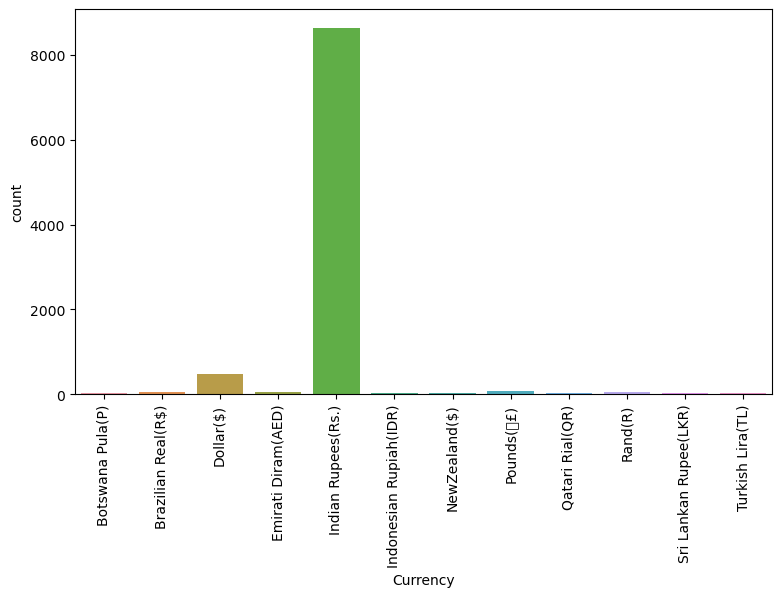

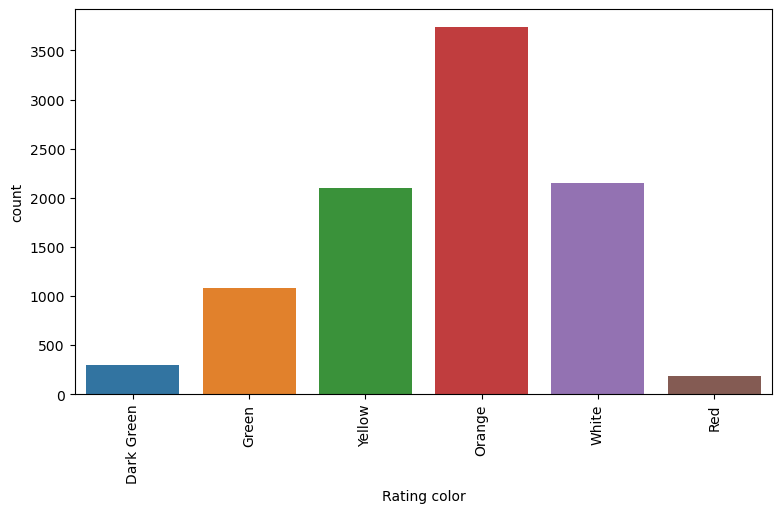

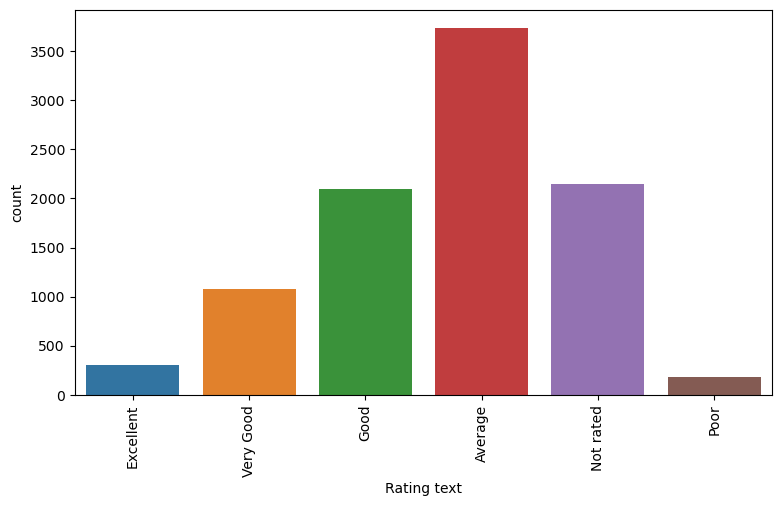

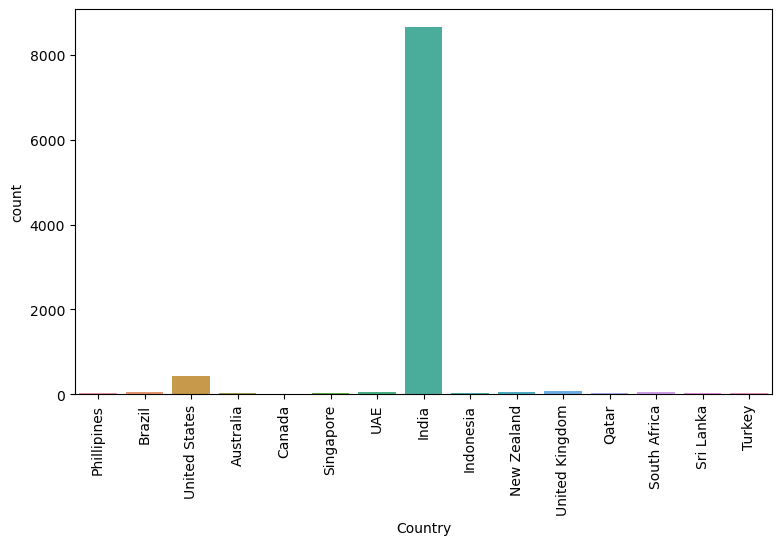

In [216]:
for i in data[cat_data]:
    plt.figure(figsize=(9,5))
    sns.countplot(x=data[cat_data][i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

1. most of the currency is in INR

2. most of the places have orange color rating

3. most of the places are average rating

4. most of the places are located in india

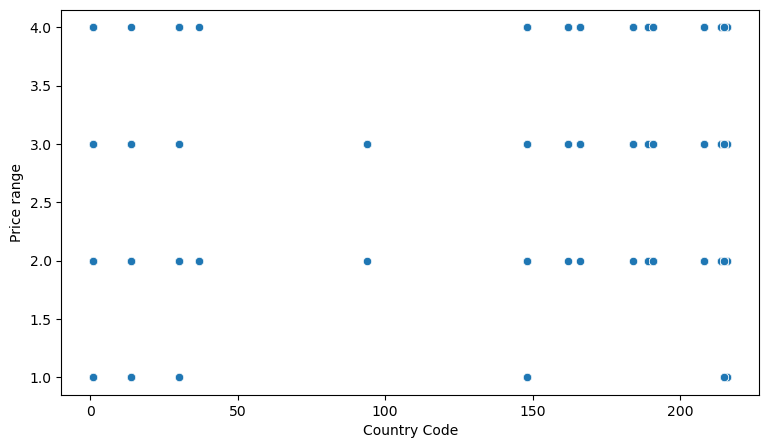

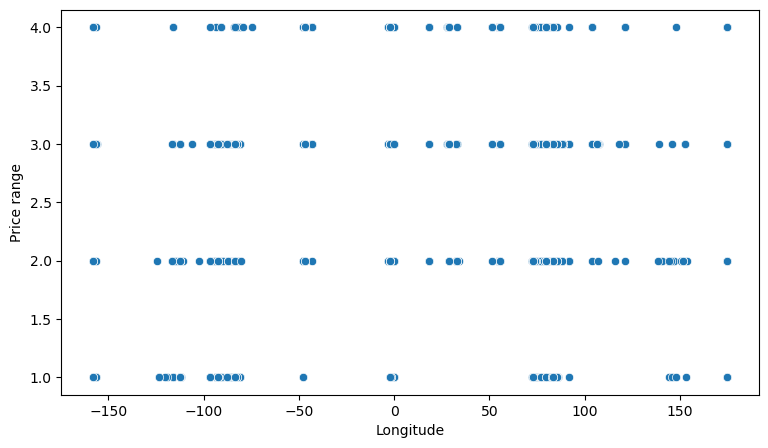

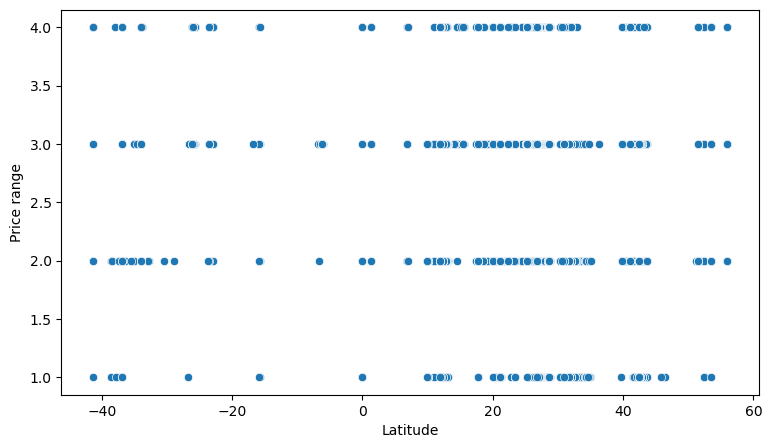

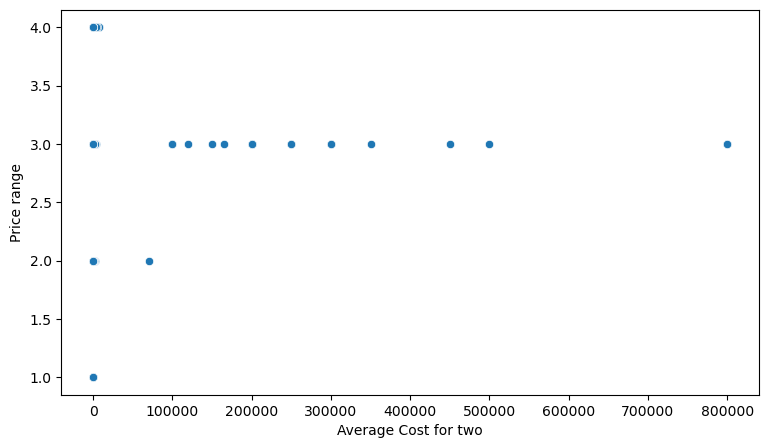

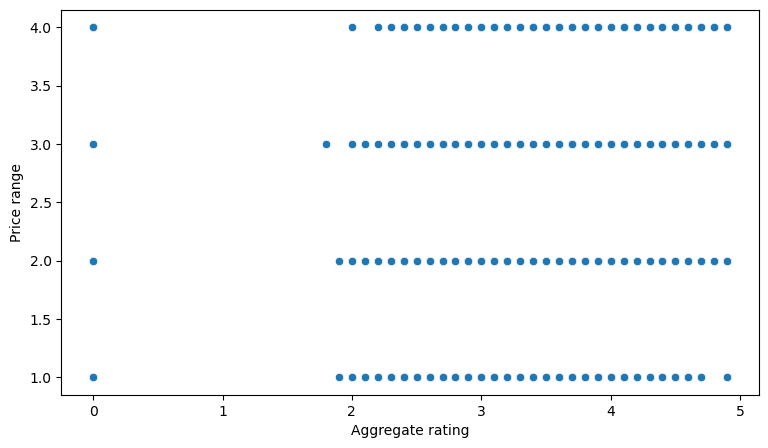

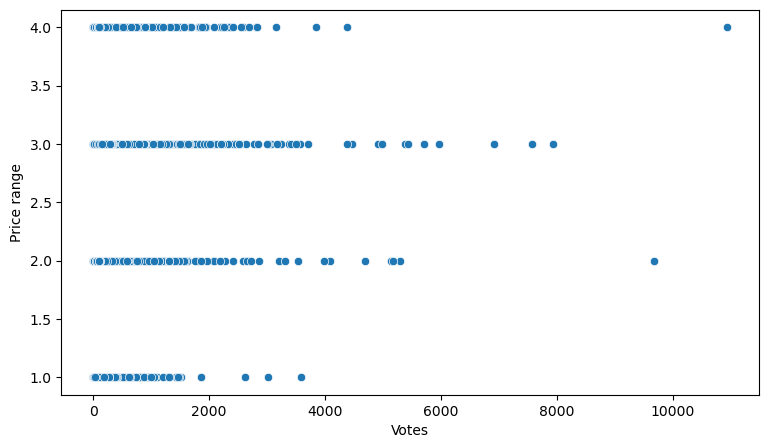

In [217]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=data[cont_data][i],y = data['Price range'])
    plt.xlabel(i)
    plt.show()

In [218]:
data.drop(['Longitude','Latitude','Country Code'],axis=1,inplace=True)

In [219]:
cont_data.remove('Longitude')

In [220]:
cont_data.remove('Latitude')

In [221]:
cont_data.remove('Country Code')

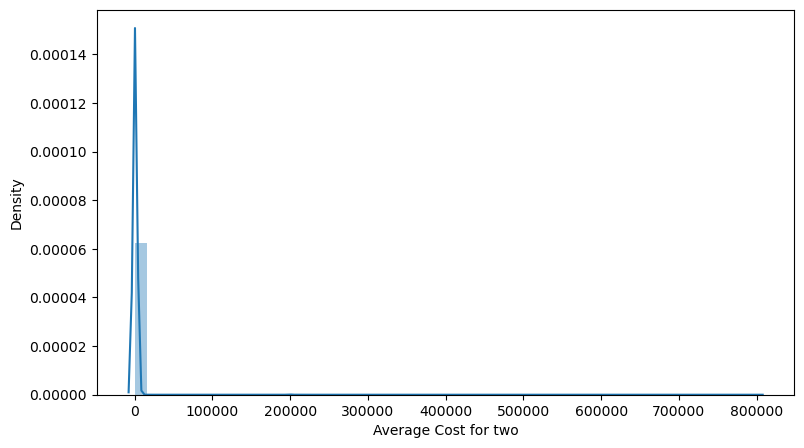

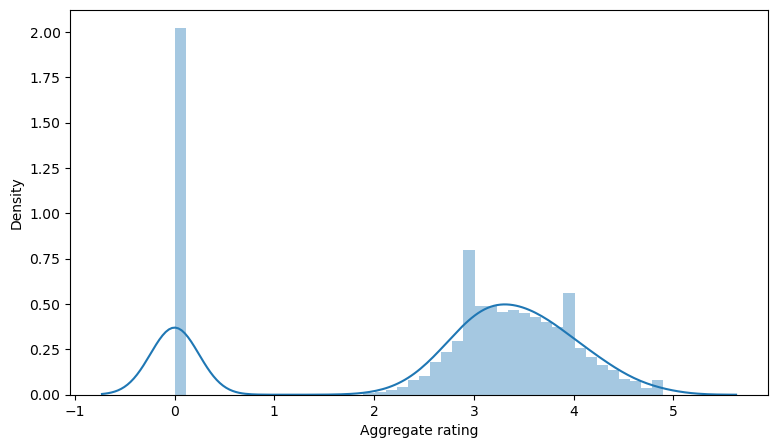

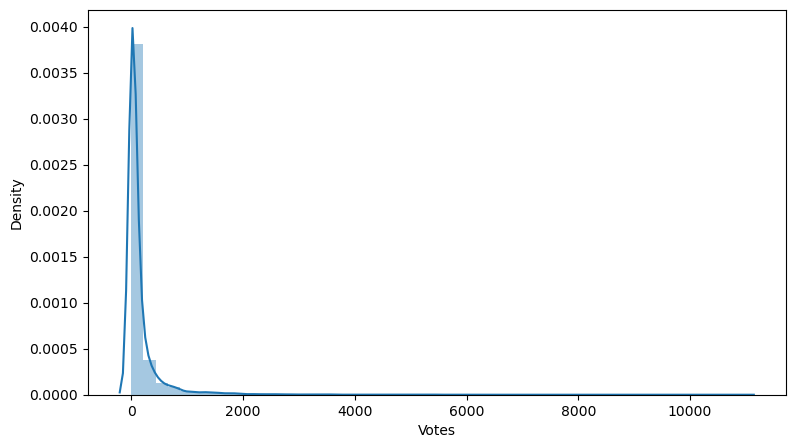

In [222]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    sns.distplot(data[cont_data][i])
    plt.xlabel(i)
    plt.show()

all the data are contionous do discrete data available

In [223]:
continous = ['Votes','Aggregate rating','Average Cost for two']

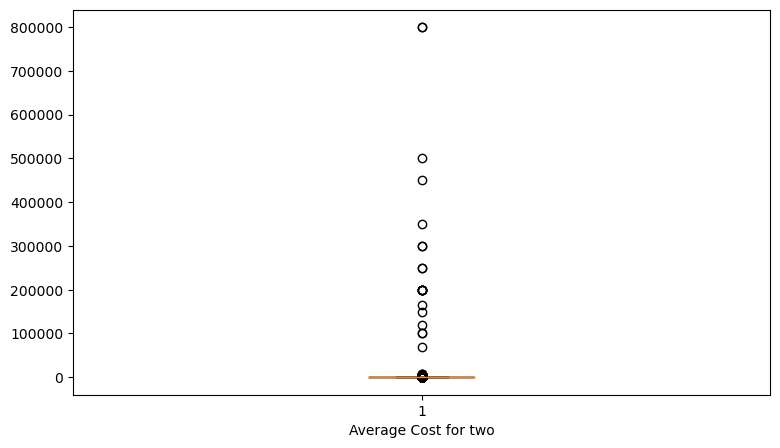

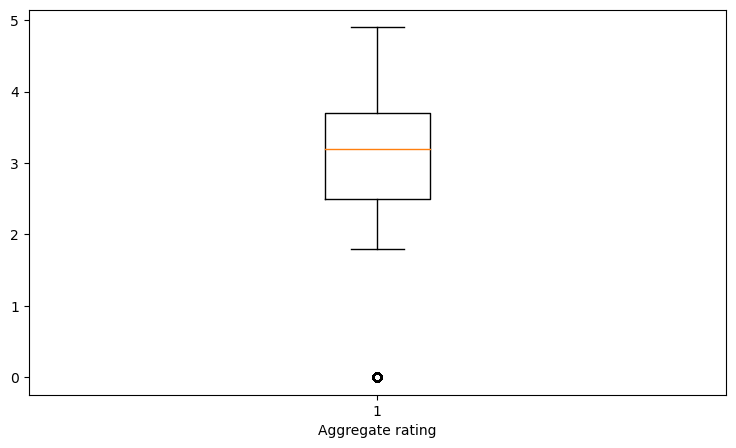

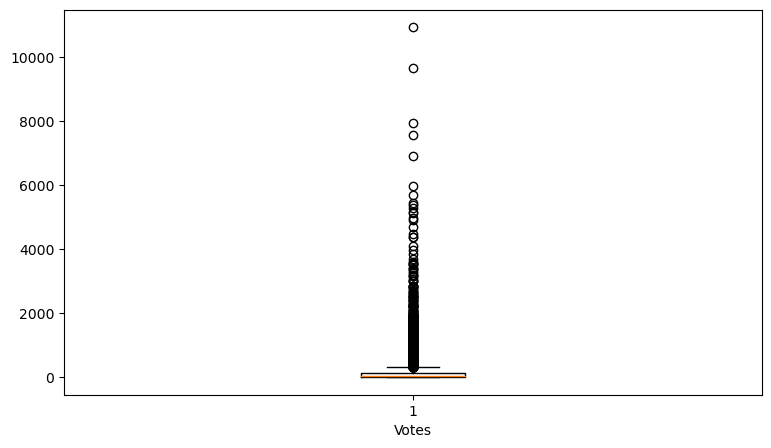

In [224]:
for i in data[cont_data]:
    plt.figure(figsize=(9,5))
    plt.boxplot(x=data[cont_data][i])
    plt.xlabel(i)
    plt.show()


all the features have outliers

# DEALING WITH OUTLIERS

In [225]:
z = zscore(data[continous])

In [226]:
data = data[(z<3).all(axis=1)]

In [227]:
data.shape

(9353, 8)

In [228]:
data_loss = (9542-9353)/9542

In [229]:
data_loss

0.019807168308530708

# FEATURE SELECTION

In [230]:
data.corr()['Price range'].sort_values()

Votes                   0.401497
Aggregate rating        0.427179
Average Cost for two    0.668656
Price range             1.000000
Name: Price range, dtype: float64

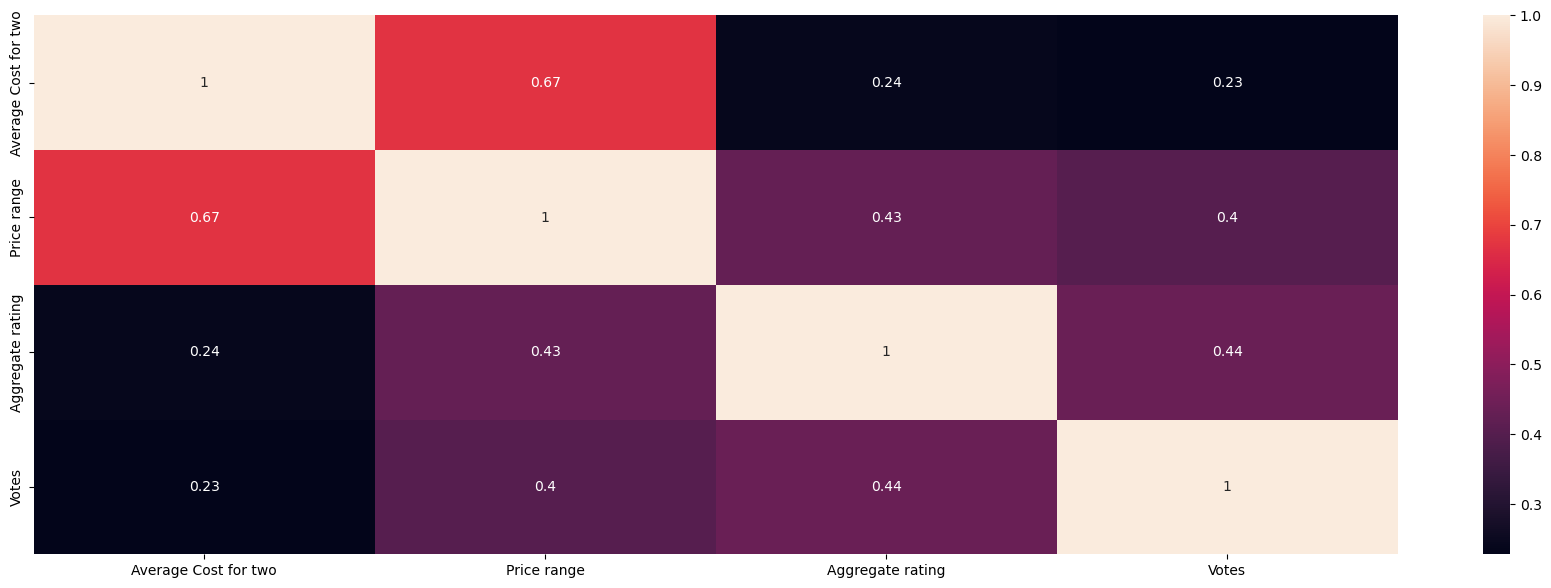

In [231]:
plt.figure(figsize=(22,7))

sns.heatmap(data.corr(),annot=True)

plt.show()

In [232]:
data.head()

,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,
6317637,1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,314,Phillipines
6304287,1200,Botswana Pula(P),3,4.5,Dark Green,Excellent,591,Phillipines
6300002,4000,Botswana Pula(P),4,4.4,Green,Very Good,270,Phillipines
6318506,1500,Botswana Pula(P),4,4.9,Dark Green,Excellent,365,Phillipines
6314302,1500,Botswana Pula(P),4,4.8,Dark Green,Excellent,229,Phillipines


In [233]:
data.shape

(9353, 8)

In [234]:
le = LabelEncoder()

In [235]:
cat_data

['Currency', 'Rating color', 'Rating text', 'Country']

In [236]:
data['Currency'] = le.fit_transform(data['Currency'])

In [237]:
data['Rating color'] = le.fit_transform(data['Rating color'])

In [238]:
data['Rating text'] = le.fit_transform(data['Rating text'])

In [239]:
data['Country'] = le.fit_transform(data['Country'])

In [240]:
#data['Has Table booking'] = le.fit_transform(data['Has Table booking'])

In [241]:
#data['Has Online delivery'] = le.fit_transform(data['Has Online delivery'])

In [242]:
data.head()

,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,
6317637,1100,0,3,4.8,0,1,314,5
6304287,1200,0,3,4.5,0,1,591,5
6300002,4000,0,4,4.4,1,5,270,5
6318506,1500,0,4,4.9,0,1,365,5
6314302,1500,0,4,4.8,0,1,229,5


In [243]:
#ss = StandardScaler()

In [244]:
cat_data

['Currency', 'Rating color', 'Rating text', 'Country']

In [245]:
cont_data

['Average Cost for two', 'Aggregate rating', 'Votes']

# DATA SCALING

In [246]:
pt = PowerTransformer()

In [247]:
data[cont_data] = pt.fit_transform(data[cont_data])

In [248]:
#data[cont_data] = ss.fit_transform(data[cont_data])

In [249]:
data.head()

,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,
6317637,1.149169,0,3,1.864371,0,1,1.303148,5
6304287,1.266995,0,3,1.537271,0,1,1.657112,5
6300002,3.175769,0,4,1.431148,1,5,1.219836,5
6318506,1.580608,0,4,1.976293,0,1,1.386661,5
6314302,1.580608,0,4,1.864371,0,1,1.129475,5


In [250]:
x = data.drop('Price range',axis=1)

y = data['Price range']

In [251]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=666)

# LR

In [252]:
lr = LogisticRegression()

In [253]:
lr.fit(x_train,y_train)

LogisticRegression()

In [254]:
pred1 = lr.predict(x_train)

In [255]:
pred2 = lr.predict(x_test)

In [256]:
print(f'Train Score: {accuracy_score(y_train,pred1)}')

Train Score: 0.8462977813418872


In [257]:
print(f'Test Score: {accuracy_score(y_test,pred2)}')

Test Score: 0.8498129342597541


In [258]:
a1 = accuracy_score(y_train,pred1)

In [259]:
a2 = accuracy_score(y_test,pred2)

In [260]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       897
           2       0.81      0.88      0.84       593
           3       0.73      0.62      0.67       273
           4       0.73      0.40      0.51       108

    accuracy                           0.85      1871
   macro avg       0.80      0.71      0.74      1871
weighted avg       0.84      0.85      0.84      1871



In [261]:
print(confusion_matrix(y_test,pred2))

[[854  43   0   0]
 [ 55 523  14   1]
 [ 10  78 170  15]
 [ 13   4  48  43]]


In [262]:
cv = cross_val_score(lr,x,y)

a3 = cv.mean()

a3

0.8338522395013104

# KNN

In [263]:
knn = KNeighborsClassifier()

In [264]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [265]:
pred3 = knn.predict(x_train)

In [266]:
pred4 = knn.predict(x_test)

In [267]:
print(f'Train Score: {accuracy_score(y_train,pred3)}')

Train Score: 0.9593691526329858


In [268]:
print(f'Test Score: {accuracy_score(y_test,pred4)}')

Test Score: 0.9417423837520043


In [269]:
a4 = accuracy_score(y_train,pred3)

In [270]:
a5 = accuracy_score(y_test,pred4)

In [271]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       897
           2       0.92      0.95      0.94       593
           3       0.85      0.84      0.84       273
           4       0.91      0.74      0.82       108

    accuracy                           0.94      1871
   macro avg       0.92      0.88      0.90      1871
weighted avg       0.94      0.94      0.94      1871



In [272]:
print(confusion_matrix(y_test,pred4))

[[889   8   0   0]
 [ 14 565  14   0]
 [  0  37 228   8]
 [  0   1  27  80]]


In [273]:
cv = cross_val_score(knn,x,y)

a6 = cv.mean()

a6

0.9058101561405867

# DT

In [274]:
dt = DecisionTreeClassifier()

In [275]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [276]:
pred5 = dt.predict(x_train)

In [277]:
pred6 = dt.predict(x_test)

In [278]:
print(f'Train Score: {accuracy_score(y_train,pred5)}')

Train Score: 0.9985298048650093


In [279]:
print(f'Test Score: {accuracy_score(y_test,pred6)}')

Test Score: 0.951362907536077


In [280]:
a7 = accuracy_score(y_train,pred5)

In [281]:
a8 = accuracy_score(y_test,pred6)

In [282]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       897
           2       0.94      0.94      0.94       593
           3       0.88      0.86      0.87       273
           4       0.89      0.94      0.91       108

    accuracy                           0.95      1871
   macro avg       0.92      0.93      0.93      1871
weighted avg       0.95      0.95      0.95      1871



In [283]:
print(confusion_matrix(y_test,pred6))

[[887  10   0   0]
 [ 12 555  26   0]
 [  1  23 236  13]
 [  0   0   6 102]]


In [284]:
cv = cross_val_score(dt,x,y)

a9 = cv.mean()

a9

0.9108284339925173

# RF

In [285]:
rf = RandomForestClassifier()

In [286]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [287]:
pred7 = rf.predict(x_train)

In [288]:
pred8 = rf.predict(x_test)

In [289]:
print(f'Train Score: {accuracy_score(y_train,pred7)}')

Train Score: 0.9985298048650093


In [290]:
print(f'Test Score: {accuracy_score(y_test,pred8)}')

Test Score: 0.9668626402993051


In [291]:
a10 = accuracy_score(y_train,pred7)

In [292]:
a11 = accuracy_score(y_test,pred8)

In [293]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       897
           2       0.95      0.97      0.96       593
           3       0.94      0.89      0.92       273
           4       0.95      0.91      0.93       108

    accuracy                           0.97      1871
   macro avg       0.96      0.94      0.95      1871
weighted avg       0.97      0.97      0.97      1871



In [294]:
print(confusion_matrix(y_test,pred8))

[[893   4   0   0]
 [ 13 574   6   0]
 [  0  24 244   5]
 [  0   0  10  98]]


In [295]:
cv = cross_val_score(rf,x,y)

a12 = cv.mean()

a12

0.8991789686089684

# ada

In [296]:
ada = AdaBoostClassifier()

In [297]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [298]:
pred9 = ada.predict(x_train)

In [299]:
pred10 = ada.predict(x_test)

In [300]:
print(f'Train Score: {accuracy_score(y_train,pred9)}')

Train Score: 0.8374766105319433


In [301]:
print(f'Test Score: {accuracy_score(y_test,pred10)}')

Test Score: 0.8385889898450026


In [302]:
a13 = accuracy_score(y_train,pred9)

In [303]:
a14 = accuracy_score(y_test,pred10)

In [304]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       897
           2       0.68      0.97      0.80       593
           3       0.82      0.13      0.23       273
           4       0.89      0.79      0.83       108

    accuracy                           0.84      1871
   macro avg       0.84      0.72      0.71      1871
weighted avg       0.86      0.84      0.80      1871



In [305]:
print(confusion_matrix(y_test,pred10))

[[872  25   0   0]
 [ 14 576   1   2]
 [  0 228  36   9]
 [  0  16   7  85]]


In [306]:
cv = cross_val_score(ada,x,y)

a15 = cv.mean()

a15

0.8060545277340323

# GBDT

In [307]:
gb = GradientBoostingClassifier()

In [308]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [309]:
pred11 = gb.predict(x_train)

In [310]:
pred12 = gb.predict(x_test)

In [311]:
print(f'Train Score: {accuracy_score(y_train,pred11)}')

Train Score: 0.9760759155306068


In [312]:
print(f'Test Score: {accuracy_score(y_test,pred12)}')

Test Score: 0.968466060929984


In [313]:
a16 = accuracy_score(y_train,pred11)

In [314]:
a17 = accuracy_score(y_test,pred12)

In [315]:
print(classification_report(y_test,pred12))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       897
           2       0.96      0.97      0.97       593
           3       0.95      0.89      0.91       273
           4       0.92      0.91      0.92       108

    accuracy                           0.97      1871
   macro avg       0.95      0.94      0.95      1871
weighted avg       0.97      0.97      0.97      1871



In [316]:
print(confusion_matrix(y_test,pred12))

[[897   0   0   0]
 [ 14 575   4   0]
 [  0  23 242   8]
 [  0   0  10  98]]


In [317]:
cv = cross_val_score(gb,x,y)

a18 = cv.mean()

a18

0.9294325148552206

# SVM

In [318]:
svm = SVC()

In [319]:
svm.fit(x_train,y_train)

SVC()

In [320]:
pred15 = svm.predict(x_train)

In [321]:
pred16 = svm.predict(x_test)

In [322]:
print(f'Train Score: {accuracy_score(y_train,pred15)}')

Train Score: 0.9065757818765036


In [323]:
print(f'Test Score: {accuracy_score(y_test,pred16)}')

Test Score: 0.8984500267236771


In [324]:
a19 = accuracy_score(y_train,pred15)

In [325]:
a20 = accuracy_score(y_test,pred16)

In [326]:
print(classification_report(y_test,pred16))

              precision    recall  f1-score   support

           1       0.98      0.96      0.97       897
           2       0.85      0.95      0.90       593
           3       0.78      0.73      0.75       273
           4       0.82      0.52      0.64       108

    accuracy                           0.90      1871
   macro avg       0.86      0.79      0.81      1871
weighted avg       0.90      0.90      0.90      1871



In [327]:
print(confusion_matrix(y_test,pred16))

[[862  35   0   0]
 [ 15 564  12   2]
 [  5  59 199  10]
 [  2   6  44  56]]


In [328]:
cv = cross_val_score(svm,x,y)

a21 = cv.mean()

a21

0.8797230455274283

In [329]:
model = ['LR','KNN','DT','RF','ADA','GBDT','SVM']

In [330]:
train = []
test = []
cv = []

In [331]:
train.append(a1)
test.append(a2)
cv.append(a3)

train.append(a4)
test.append(a5)
cv.append(a6)

train.append(a7)
test.append(a8)
cv.append(a9)

train.append(a10)
test.append(a11)
cv.append(a12)

train.append(a13)
test.append(a14)
cv.append(a15)

train.append(a16)
test.append(a17)
cv.append(a18)

train.append(a19)
test.append(a20)
cv.append(a21)

In [332]:
result = pd.DataFrame({"MODEL":model,"TRAIN":train,"TEST":test,'CV':cv})

In [333]:
result

,MODEL,TRAIN,TEST,CV
0,LR,0.846298,0.849813,0.833852
1,KNN,0.959369,0.941742,0.905810
2,DT,0.998530,0.951363,0.910828
3,RF,0.998530,0.966863,0.899179
4,ADA,0.837477,0.838589,0.806055
5,GBDT,0.976076,0.968466,0.929433
6,SVM,0.906576,0.898450,0.879723


GBDT is the best model

# HYPER PARAMETER TUNING

In [334]:
gb = GradientBoostingClassifier()

In [335]:
para = {'loss':['log_loss', 'deviance', 'exponential'],
       'learning_rate':[0.001,0.01,0.1,1,10],
       'n_estimators':[100,150,200,250,300],
       'criterion':['friedman_mse', 'squared_error'],
       'min_samples_split':[2,3],
       'min_samples_leaf':[1,2],
       'max_depth':[2,3,4]}

In [336]:
rs = RandomizedSearchCV(gb,para,n_jobs=-1)

In [337]:
rs.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]})

In [338]:
rs.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'loss': 'log_loss',
 'learning_rate': 0.1,
 'criterion': 'squared_error'}

In [339]:
rs.best_estimator_.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', min_samples_leaf=2,
                           n_estimators=250)

In [340]:
trainpred = rs.best_estimator_.predict(x_train)

In [341]:
testpred = rs.best_estimator_.predict(x_test)

In [342]:
print(f'Train Score: {accuracy_score(y_train,trainpred)}')

Train Score: 0.98342689120556


In [343]:
print(f'Train Score: {accuracy_score(y_test,testpred)}')

Train Score: 0.9711384286477819


In [344]:
cv = cross_val_score(rs.best_estimator_,x,y)

cv_mean = cv.mean()

cv_mean

0.9167118730296646

In [345]:
testpred_prob = rs.best_estimator_.predict_proba(x_test)

In [346]:
roc_auc_score(y_test,testpred_prob,multi_class='ovr')

0.9947298925223249

In [347]:
print(confusion_matrix(y_test,testpred))

[[896   1   0   0]
 [ 13 576   4   0]
 [  0  22 247   4]
 [  0   0  10  98]]


In [348]:
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       897
           2       0.96      0.97      0.97       593
           3       0.95      0.90      0.93       273
           4       0.96      0.91      0.93       108

    accuracy                           0.97      1871
   macro avg       0.96      0.95      0.95      1871
weighted avg       0.97      0.97      0.97      1871



In [349]:
conclusion =pd.DataFrame({'Original':y_test,"Predicted":testpred})

In [350]:
conclusion

,Original,Predicted
Restaurant ID,,
18419917,1,1
7712,2,2
18303719,1,1
9433,1,1
17960073,3,2
...,...,...
18481291,2,2
18384227,3,4
305548,4,4


In [351]:
pickle.dump(rs.best_estimator_,open('zomato_class.pkl','wb'))